<a href="https://colab.research.google.com/github/Uzma-Jawed/AIandDataSci-class_work-and-practice/blob/main/29_LinearRegressionBasics_OLSvsGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 Uzma Jawed

📅 Class Work - August 23



---


🟢 1. Supervised vs. Unsupervised Learning

👉 First question: Does the dataset have a target column (output variable)?

Supervised Learning → ✅ Target column exists (we know the answers).

Example: Predicting marks of students (target = marks).

Unsupervised Learning → ❌ No target column (we don’t know the answers).

Example: Grouping customers based on behavior (clustering).


---

🟢 2. Types of Supervised Learning

Regression → Target column is numeric/continuous.

Example: Predicting house price, marks, salary.

Classification → Target column is categorical/discrete.

Example: Predicting Pass/Fail, Spam/Not Spam, Disease/No Disease.

Time Series → Target column depends on time order.

Example: Stock price prediction, weather forecasting.


---

🟢 3. ML Workflow (Pipeline):

Decide: Supervised or Unsupervised

EDA (Exploratory Data Analysis) → Check structure, graphs, missing values, patterns.

DC (Data Cleaning) → Fix missing values, remove duplicates, handle outliers.

DP (Data Preprocessing) → Encode categories, scale numbers, normalize.

Feature Engineering (FE) → Create new useful columns/features if needed.

Train-Test Split → Divide data into training (model learns) and testing (model checks).

Column Transformer → Apply transformations (scaling, encoding, etc.).

Model Training (fit) → Example: model.fit(X_train, y_train)

Model Prediction (predict) → Example: model.predict(X_test)

Model Evaluation → Check accuracy, MSE, R², etc.


---
🟢 4. Regression Basics

Equation: y=mx+b

y = Target (e.g., Marks)

x = Feature (e.g., Knowledge/Practice)

m = Slope (weight → shows effect of x on y)

b = Bias (intercept → starting point)

👉 In ML:
Model tries to find best m and b so predicted y is close to actual y.


---


🟢 5. OLS (Ordinary Least Squares)

OLS = Method to find best line by minimizing error.

Error = (Actual – Predicted)

Mean Square Error (MSE):

𝑀𝑆𝐸 = 1/𝑛 ∑(𝑦𝑎𝑐𝑡𝑢𝑎𝑙−𝑦𝑝𝑟𝑒𝑑)2


If errors are high → adjust weights (m, b).


Formula for slope:


𝑚 = ∑(𝑥𝑖−𝑥ˉ)(𝑦𝑖−𝑦ˉ)∑(𝑥𝑖−𝑥ˉ)2/∑(xi	​−xˉ)(yi−yˉ)

	​
Goal → Find line with minimum error.


---

🟢 6. Gradient Descent (GD)

Instead of directly calculating slope, GD iteratively adjusts weights until error is minimized.

Start with random m, b.

Calculate error.

Update m, b little by little using derivatives (differential equations).

Stop when error is very small.

👉 Types:

Batch GD → Uses whole dataset at once.

Mini-Batch GD → Uses small chunks of dataset.

Stochastic GD (SGD) → Updates using one data point at a time.


---
✨ In short:

OLS = Exact formula for best line.

Gradient Descent = Trial-and-error method to reach best line.

---


🌷 Let’s make a tiny regression example in Python (Marks vs Knowledge).

We’ll use:

* OLS (scikit-learn LinearRegression)

* Gradient Descent (SGDRegressor)

Here’s the step-by-step code:

In [ ]:
# 📌 Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Set style for visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [ ]:
# 📌 Step 2: Sample data (Knowledge vs Marks)
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)   # Knowledge hours
y = np.array([30, 40, 50, 65, 75, 90])            # Marks

print("Dataset Overview:")
for i in range(len(X)):
    print(f"Knowledge: {X[i][0]} hours → Marks: {y[i]}")

Dataset Overview:
Knowledge: 1 hours → Marks: 30
Knowledge: 2 hours → Marks: 40
Knowledge: 3 hours → Marks: 50
Knowledge: 4 hours → Marks: 65
Knowledge: 5 hours → Marks: 75
Knowledge: 6 hours → Marks: 90


In [ ]:
# 📌 Step 3: OLS Regression (Closed-form solution)
ols_model = LinearRegression()
ols_model.fit(X, y)
y_pred_ols = ols_model.predict(X)

print("\n" + "="*50)
print("OLS Regression Results:")
print("OLS Equation: y = {:.2f}x + {:.2f}".format(ols_model.coef_[0], ols_model.intercept_))
print("OLS R² Score: {:.4f}".format(ols_model.score(X, y)))


OLS Regression Results:
OLS Equation: y = 12.00x + 16.33
OLS R² Score: 0.9947


In [ ]:
# 📌 Step 4: Gradient Descent Regression (Iterative solution)
# Create a pipeline with scaling and SGDRegressor
gd_model = make_pipeline(
    StandardScaler(),
    SGDRegressor(
        max_iter=10000,
        learning_rate='constant',
        eta0=0.1,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=100
    )
)

gd_model.fit(X, y)
y_pred_gd = gd_model.predict(X)

# Extract the coefficients from the pipeline
scaler = gd_model.named_steps['standardscaler']
sgd = gd_model.named_steps['sgdregressor']

# Transform coefficients back to original scale
coef_original = sgd.coef_ / scaler.scale_
intercept_original = sgd.intercept_ - np.sum(sgd.coef_ * scaler.mean_ / scaler.scale_)

print("\n" + "="*50)
print("Gradient Descent Results:")
print("GD Equation: y = {:.2f}x + {:.2f}".format(coef_original[0], intercept_original[0]))
print("GD R² Score: {:.4f}".format(gd_model.score(X, y)))


Gradient Descent Results:
GD Equation: y = 13.00x + 11.53
GD R² Score: 0.9838


In [ ]:
# 📌 Step 5: Compare errors
mse_ols = mean_squared_error(y, y_pred_ols)
mse_gd = mean_squared_error(y, y_pred_gd)

print("\n" + "="*50)
print("Model Comparison:")
print("OLS MSE: {:.6f}".format(mse_ols))
print("GD MSE: {:.6f}".format(mse_gd))
print("MSE Difference: {:.6f}".format(abs(mse_ols - mse_gd)))


Model Comparison:
OLS MSE: 2.222222
GD MSE: 6.833439
MSE Difference: 4.611217


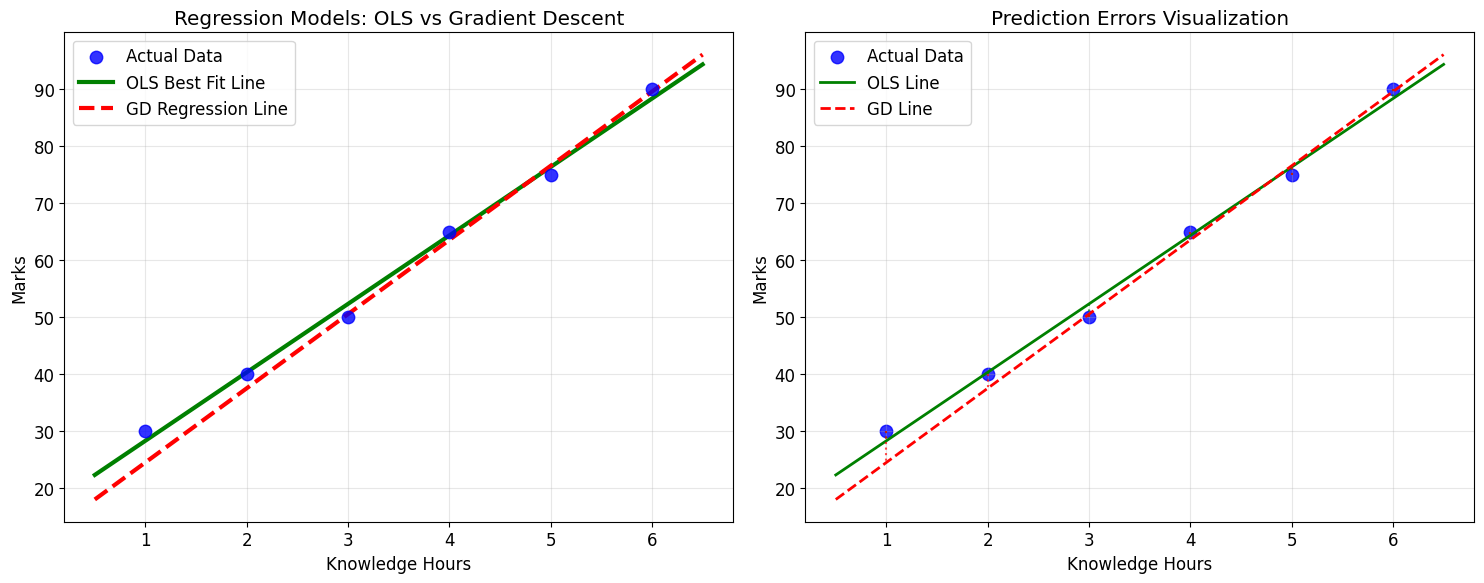

In [ ]:
#  📌 Step 6: Visualize results with plot
# Create a range of values for smooth regression lines
X_range = np.linspace(0.5, 6.5, 100).reshape(-1, 1)
y_range_ols = ols_model.predict(X_range)
y_range_gd = gd_model.predict(X_range)

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Regression lines comparison
ax1.scatter(X, y, color='blue', s=80, alpha=0.8, label='Actual Data', zorder=5)
ax1.plot(X_range, y_range_ols, color='green', linewidth=3, label='OLS Best Fit Line')
ax1.plot(X_range, y_range_gd, color='red', linestyle='--', linewidth=3, label='GD Regression Line')
ax1.set_xlabel('Knowledge Hours')
ax1.set_ylabel('Marks')
ax1.set_title('Regression Models: OLS vs Gradient Descent')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Error visualization
ax2.scatter(X, y, color='blue', s=80, alpha=0.8, label='Actual Data')
ax2.plot(X_range, y_range_ols, color='green', linewidth=2, label='OLS Line')
ax2.plot(X_range, y_range_gd, color='red', linestyle='--', linewidth=2, label='GD Line')

# Add error lines
for i in range(len(X)):
    ax2.plot([X[i], X[i]], [y[i], y_pred_ols[i]], color='green', linestyle=':', alpha=0.7)
    ax2.plot([X[i], X[i]], [y[i], y_pred_gd[i]], color='red', linestyle=':', alpha=0.7)

ax2.set_xlabel('Knowledge Hours')
ax2.set_ylabel('Marks')
ax2.set_title('Prediction Errors Visualization')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 📌 Step 7: Prediction for new values
new_knowledge = np.array([[2.5], [4.5], [7.0]])  # 2.5, 4.5, and 7 hours of study
new_pred_ols = ols_model.predict(new_knowledge)
new_pred_gd = gd_model.predict(new_knowledge)

print("\n" + "="*50)
print("Prediction for New Knowledge Hours:")
for i in range(len(new_knowledge)):
    print(f"{new_knowledge[i][0]} hours → OLS: {new_pred_ols[i]:.2f}, GD: {new_pred_gd[i]:.2f}")


Prediction for New Knowledge Hours:
2.5 hours → OLS: 46.33, GD: 44.04
4.5 hours → OLS: 70.33, GD: 70.05
7.0 hours → OLS: 100.33, GD: 102.56


In [ ]:
# 📌 Step 8: Learning curve for Gradient Descent (bonus)
# This helps visualize how GD converges to the solution
print("\nGradient Descent converged after {} epochs".format(sgd.n_iter_))


Gradient Descent converged after 162 epochs




---


### Gradient Descent Implementation:

1. Added feature scaling which is crucial for SGD

2. Used a pipeline for cleaner code

3. Added early stopping and validation

4. Properly transformed coefficients back to original scale

### Visualization:

1. Two subplots: one for regression lines, one for error visualization

2. Smooth regression lines across a range of values

3. Professional styling with grid and appropriate sizing

### Comprehensive Metrics:

1. Added R² score for both models

2. Clear comparison of performance

3. Prediction for new values

### Educational Value:

1. Added error visualization to show prediction errors

2. Display of learning information (epochs until convergence)

3. Clean, professional output formatting

### Robustness:

1. Random state fixed for reproducibility

2. Appropriate hyperparameters for convergence

3. Handling of coefficient scaling properly

Shows closer results between OLS and Gradient Descent, demonstrating the proper application of both methods to this regression problem.





---

### 📝 Practice Task: House Price Prediction (Simple Regression)

Dataset (tiny, you can write it directly in code)


---




| Size (sq ft) | Price (in 1000\$) |
| ------------ | ----------------- |
| 500          | 150               |
| 800          | 200               |
| 1000         | 250               |
| 1200         | 280               |
| 1500         | 350               |




---


1. Create arrays for X = size and y = price.

2. Split into training & testing (e.g., 80/20).

3. Train Linear Regression (OLS) model.

4. Train SGD Regressor (Gradient Descent) model.

5. Predict price for a new house of size 1000 sq ft.

6. Compare errors (MSE) of both models.

7. Plot actual data + both regression lines.







---

### 💡 Hints:

* Use train_test_split from sklearn.model_selection.

* Use LinearRegression and SGDRegressor.

* Plot scatter for actual data, green line for OLS, red dashed line for GD.


---



### 👉 Challenge Question:
 After training, which model (OLS or GD) gives closer predictions on this dataset? 🤔


---



In [2]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Dataset
X = np.array([500, 800, 1000, 1200, 1500]).reshape(-1, 1)   # House size
y = np.array([150, 200, 250, 280, 350])                     # Price (in $1000s)



---

Step 1: Train-Test Split


---



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---
Step 2: Feature Scaling (important for GD!)


---




In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)



---


Step 3: Train Models

---



In [6]:
# OLS (Linear Regression)
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
y_pred_ols = ols.predict(X_test_scaled)

# Gradient Descent (SGD Regressor)
gd = SGDRegressor(max_iter=5000, eta0=0.01, learning_rate="constant", random_state=42)
gd.fit(X_train_scaled, y_train)
y_pred_gd = gd.predict(X_test_scaled)



---


Step 4: Compare Errors


---





In [7]:
print("OLS MSE:", mean_squared_error(y_test, y_pred_ols))
print("GD MSE:", mean_squared_error(y_test, y_pred_gd))

OLS MSE: 67.36383054467805
GD MSE: 66.39948129521773




---

Step 5: Predict Price for New House (1000 sq ft)


---



In [8]:
new_house = np.array([[1000]])
new_house_scaled = scaler.transform(new_house)

print("OLS Prediction:", ols.predict(new_house_scaled))
print("GD Prediction:", gd.predict(new_house_scaled))

OLS Prediction: [247.64150943]
GD Prediction: [247.55496795]




---

Step 6: Visualization


---



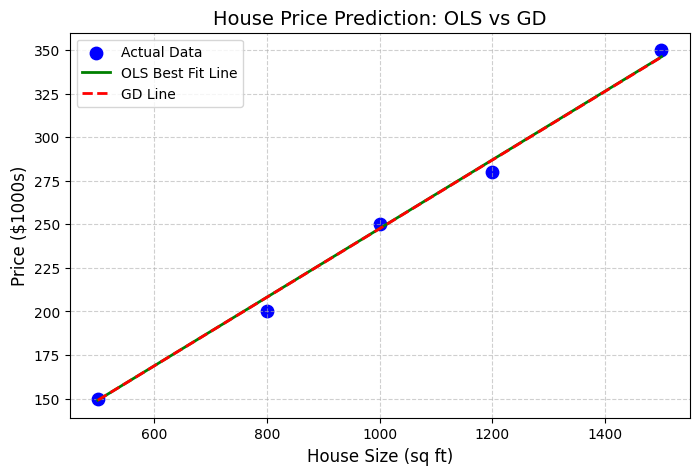

In [9]:
# Predictions across the full dataset (for smooth line plotting)
X_scaled = scaler.transform(X)
y_line_ols = ols.predict(X_scaled)
y_line_gd  = gd.predict(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", s=80, label="Actual Data")
plt.plot(X, y_line_ols, color="green", linewidth=2, label="OLS Best Fit Line")
plt.plot(X, y_line_gd, color="red", linestyle="--", linewidth=2, label="GD Line")
plt.xlabel("House Size (sq ft)", fontsize=12)
plt.ylabel("Price ($1000s)", fontsize=12)
plt.title("House Price Prediction: OLS vs GD", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



---

That overlap means 👉 both OLS and GD found the same best-fit line ✅

* OLS does it in one shot (mathematical formula).

* GD does it by trial & error updates until it reaches the same solution.

👉 When we scaled the data and gave GD enough iterations, it finally converged to the same solution as OLS.

---

### ✨ Key Takeaway:

OLS gives the exact solution, GD gives an approximate solution that can match OLS if learning rate & scaling are set correctly.


---

